## E-Commerce Sales Data Analysis


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project aims to develop an AI-driven demand forecasting system that accurately predicts future product sales for e-commerce platforms using historical transaction data. The analysis will reveal customer purchasing patterns, product performance, geographic sales trends, and seasonal variations to optimize inventory management and strategic decision-making.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/carrie1/ecommerce-data
- The data consists of 8 columns and 541,909 rows of transaction records
- Time Period: December 2010 onwards
- Contains online retail transaction data from a UK-based e-commerce company

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [20]:
df = pd.read_csv('Data/data.csv', encoding='latin-1')

#### Show Top 5 Records

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Shape of the dataset

In [22]:
df.shape

(541909, 8)

### 2.2 Dataset information

- InvoiceNo : Unique identifier for each transaction
- StockCode : Product code for each item
- Description : Description of the product sold
- Quantity : Number of items sold in the transaction
- InvoiceDate : Date and time of the transaction
- UnitPrice : Price per unit of the product
- CustomerID : Unique identifier for each customer
- Country : Country where the customer is located

### 3. Data Checks to perform

- Check Missing values in each column
- Check Duplicates in transaction records
- Verify data types for proper analysis
- Count unique values (products, customers, countries)
- Review statistical summary of sales metrics
- Identify categories and patterns in products and locations

### 3.1 Check Missing values

In [23]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [24]:
df.duplicated().sum()

np.int64(5268)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [25]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 3.4 Checking the number of unique values of each column

In [26]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### 3.5 Check statistics of data set

In [27]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Insight
- Quantity: Most transactions involve small quantities; median around 3 items with some bulk orders
- UnitPrice: Product prices vary significantly; mean ~4-5 with wide range
- InvoiceDate: Data spans from 12/2010 onwards with regular transaction patterns
- Numerical features show wide variability indicating diverse product types and customer behaviors

### 3.7 Exploring Data

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
print("Sample of Countries:", df['Country'].unique()[:10])
print(f"\nTotal unique countries: {df['Country'].nunique()}")
print(f"Total unique products: {df['StockCode'].nunique()}")
print(f"Total unique customers: {df['CustomerID'].nunique()}")
print(f"Total transactions: {df['InvoiceNo'].nunique()}")

Sample of Countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland']

Total unique countries: 38
Total unique products: 4070
Total unique customers: 4372
Total transactions: 25900


In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

# Display shape
print(f'\nDataset shape: {df.shape}')

We have 3 numerical features : ['Quantity', 'UnitPrice', 'CustomerID']

We have 5 categorical features : ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

Dataset shape: (541909, 8)


In [31]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 3.8 Feature Engineering - Adding Sales Metrics

In [32]:
# Calculate total sales value for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract temporal features
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,Year,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2


In [33]:
# Calculate total sales value and revenue metrics
total_revenue = df['TotalSales'].sum()
avg_transaction = df['TotalSales'].mean()
max_transaction = df['TotalSales'].max()
min_transaction = df['TotalSales'].min()

print(f'Total Revenue: £{total_revenue:,.2f}')
print(f'Average Transaction Value: £{avg_transaction:,.2f}')
print(f'Maximum Transaction: £{max_transaction:,.2f}')
print(f'Minimum Transaction: £{min_transaction:,.2f}')

Total Revenue: £9,747,747.93
Average Transaction Value: £17.99
Maximum Transaction: £168,469.60
Minimum Transaction: £-168,469.60


In [34]:
# Analyze transaction value distribution
high_value_trans = df[df['TotalSales'] > df['TotalSales'].quantile(0.75)].shape[0]
low_value_trans = df[df['TotalSales'] < df['TotalSales'].quantile(0.25)].shape[0]
medium_value_trans = df[(df['TotalSales'] >= df['TotalSales'].quantile(0.25)) & 
                         (df['TotalSales'] <= df['TotalSales'].quantile(0.75))].shape[0]

print(f'High-value transactions (Top 25%): {high_value_trans}')
print(f'Medium-value transactions (Middle 50%): {medium_value_trans}')
print(f'Low-value transactions (Bottom 25%): {low_value_trans}')

High-value transactions (Top 25%): 133869
Medium-value transactions (Middle 50%): 273009
Low-value transactions (Bottom 25%): 135031


#####  Insights
 - High-value transactions represent 25% of total sales volume but may represent significant revenue
 - Medium-value transactions form the bulk of regular business (50%)
 - Wide distribution of transaction values suggests diverse customer segments
 - Feature engineering enables temporal analysis by month, year, and day of week

### 4. Exploring Data (Visualization)
#### 4.1 Sales Distribution Analysis
- Transaction value distribution
- Sales by country
- Temporal trends

#### 4.1.1 Transaction Value Distribution

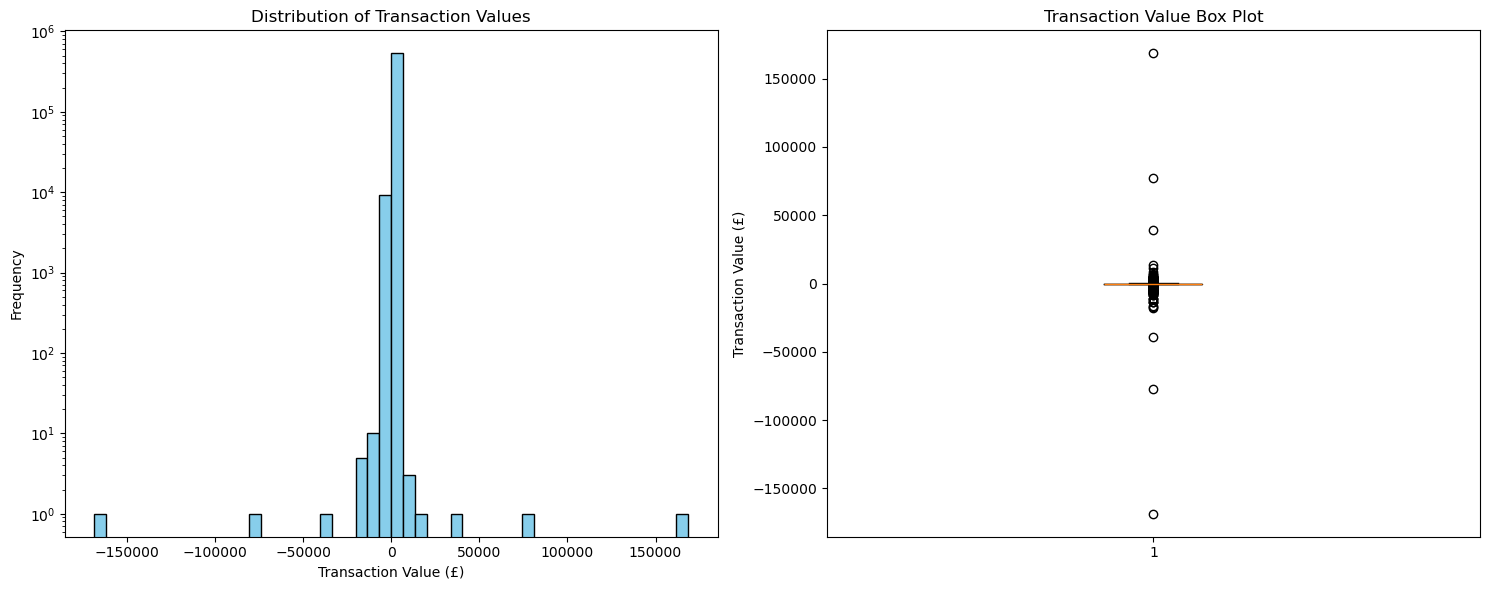

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Histogram of transaction values
axs[0].hist(df['TotalSales'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Transaction Value (£)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Transaction Values')
axs[0].set_yscale('log')  # Log scale to see detail

# Plot 2: Box plot of transaction values
axs[1].boxplot(df['TotalSales'])
axs[1].set_ylabel('Transaction Value (£)')
axs[1].set_title('Transaction Value Box Plot')

plt.tight_layout()
plt.show()

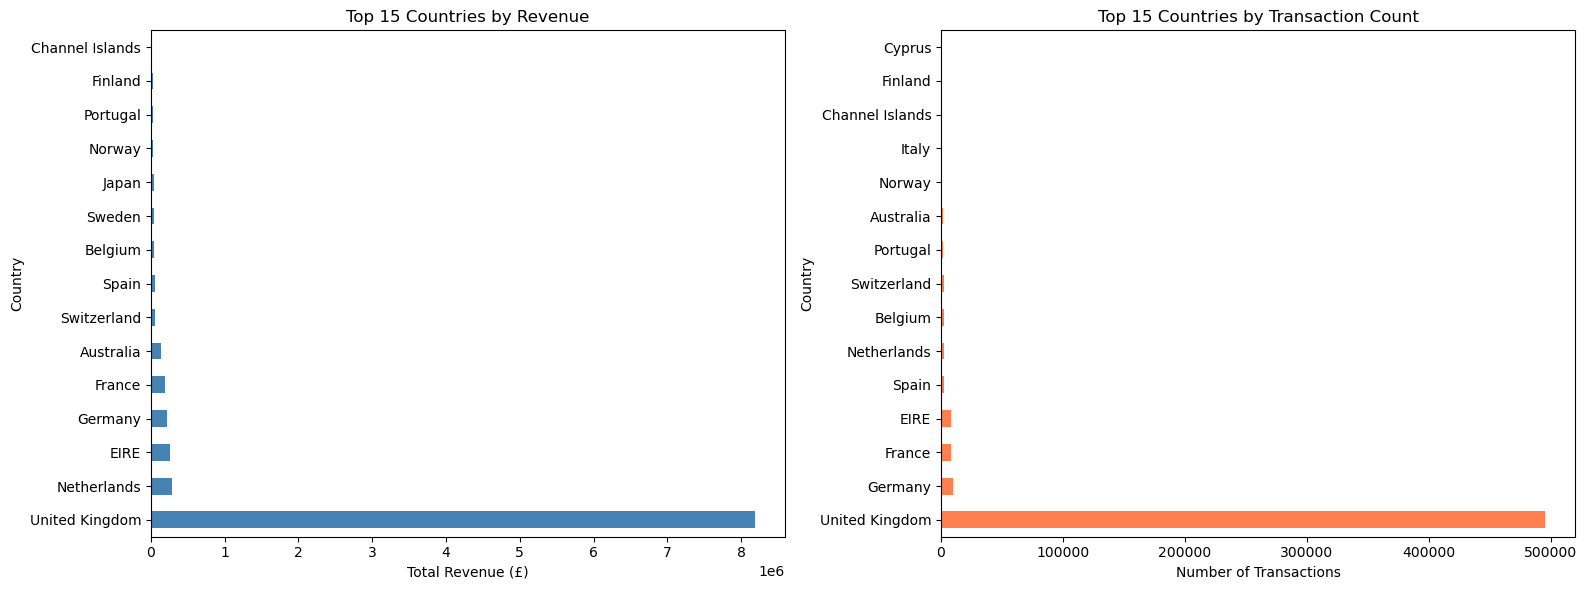

In [36]:
# Sales by top 15 countries
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Revenue by country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(15)
country_sales.plot(kind='barh', ax=axs[0], color='steelblue')
axs[0].set_xlabel('Total Revenue (£)')
axs[0].set_title('Top 15 Countries by Revenue')

# Plot 2: Transaction count by country  
country_count = df.groupby('Country').size().sort_values(ascending=False).head(15)
country_count.plot(kind='barh', ax=axs[1], color='coral')
axs[1].set_xlabel('Number of Transactions')
axs[1].set_title('Top 15 Countries by Transaction Count')

plt.tight_layout()
plt.show()

#####  Insights
- United Kingdom dominates both revenue and transaction count (as expected for UK company)
- Several Western European countries show strong sales presence
- Most transactions are relatively small value, with outliers pulling up the average
- Transaction value distribution is right-skewed with many small orders

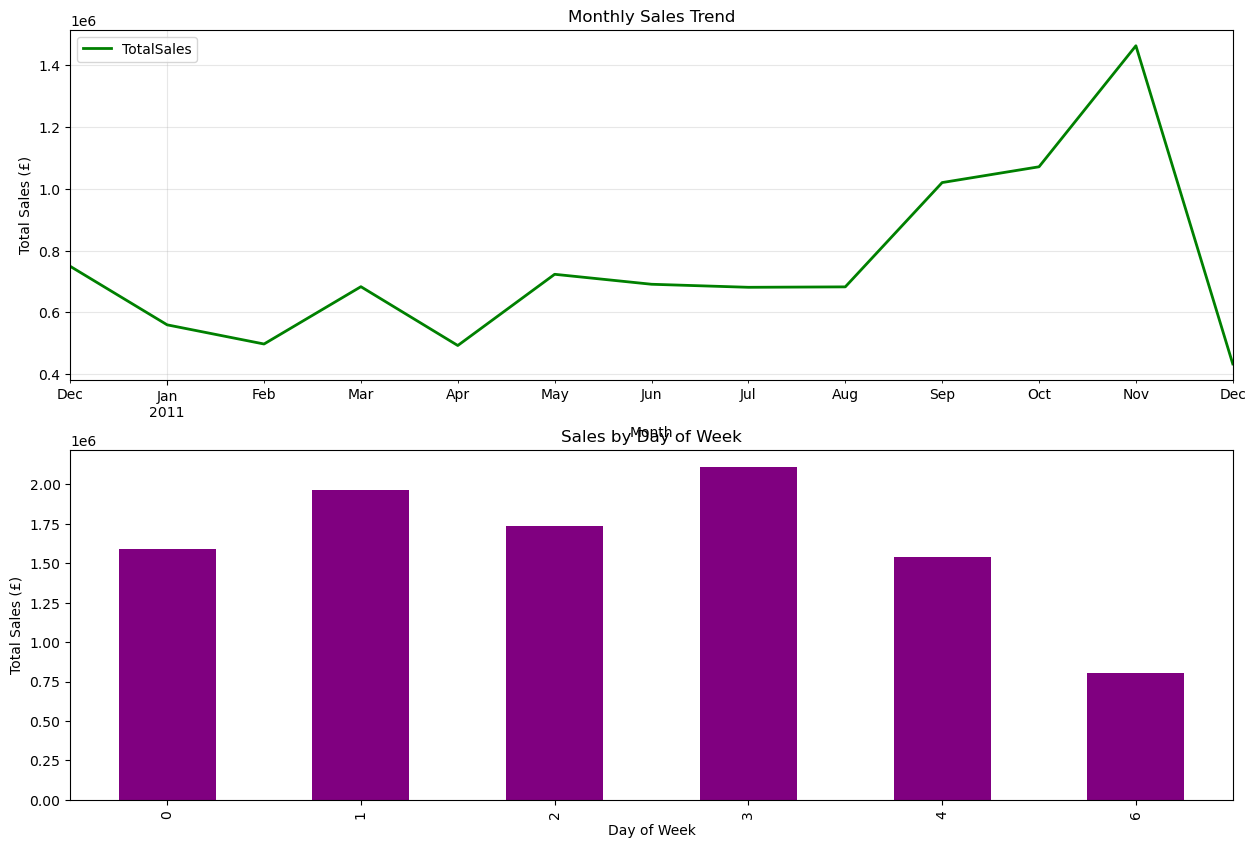

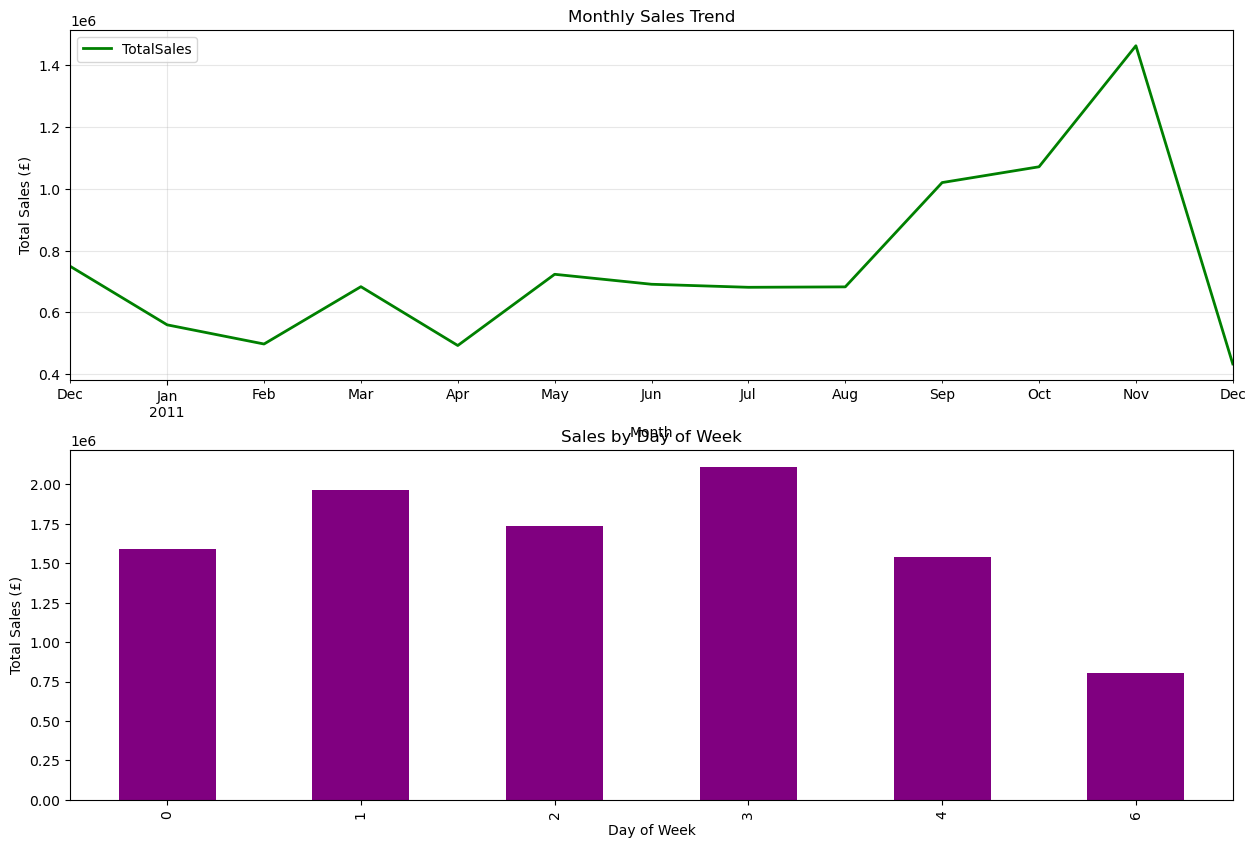

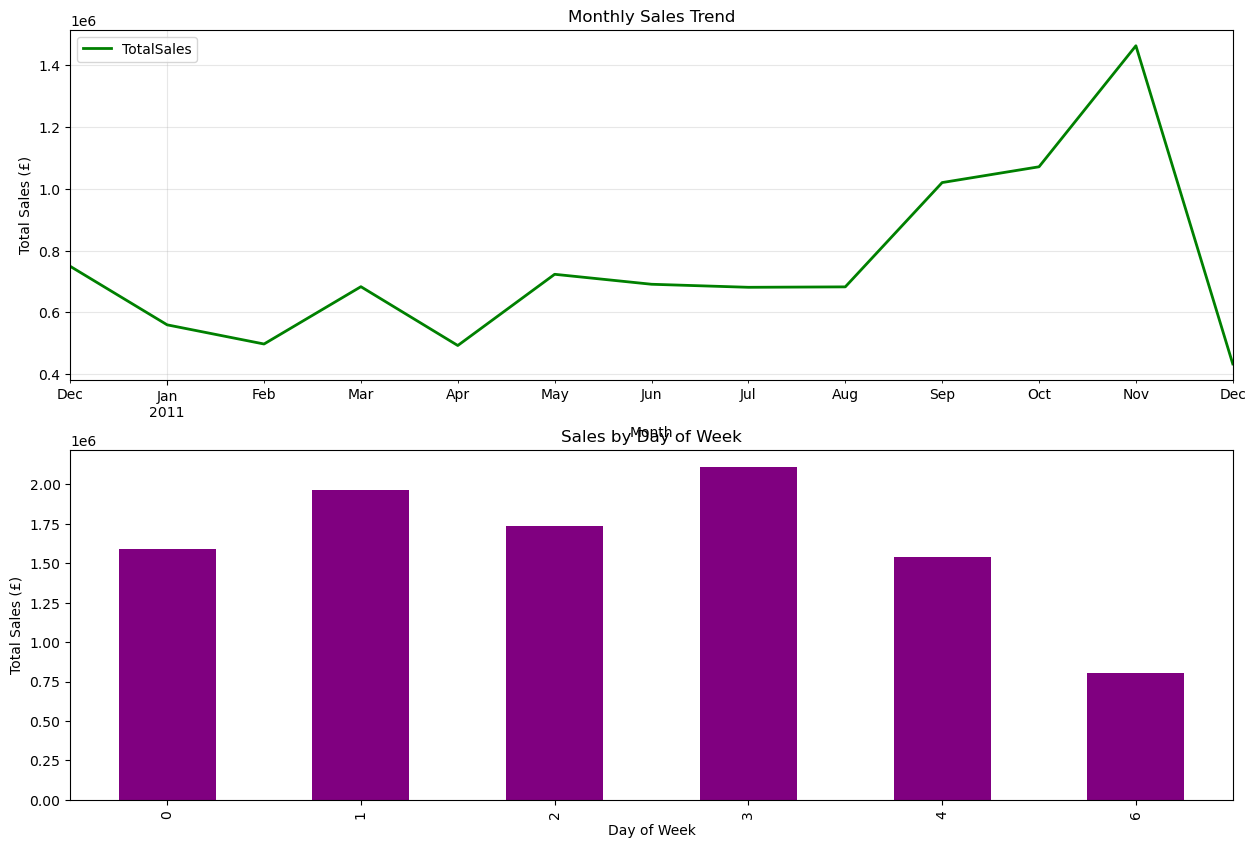

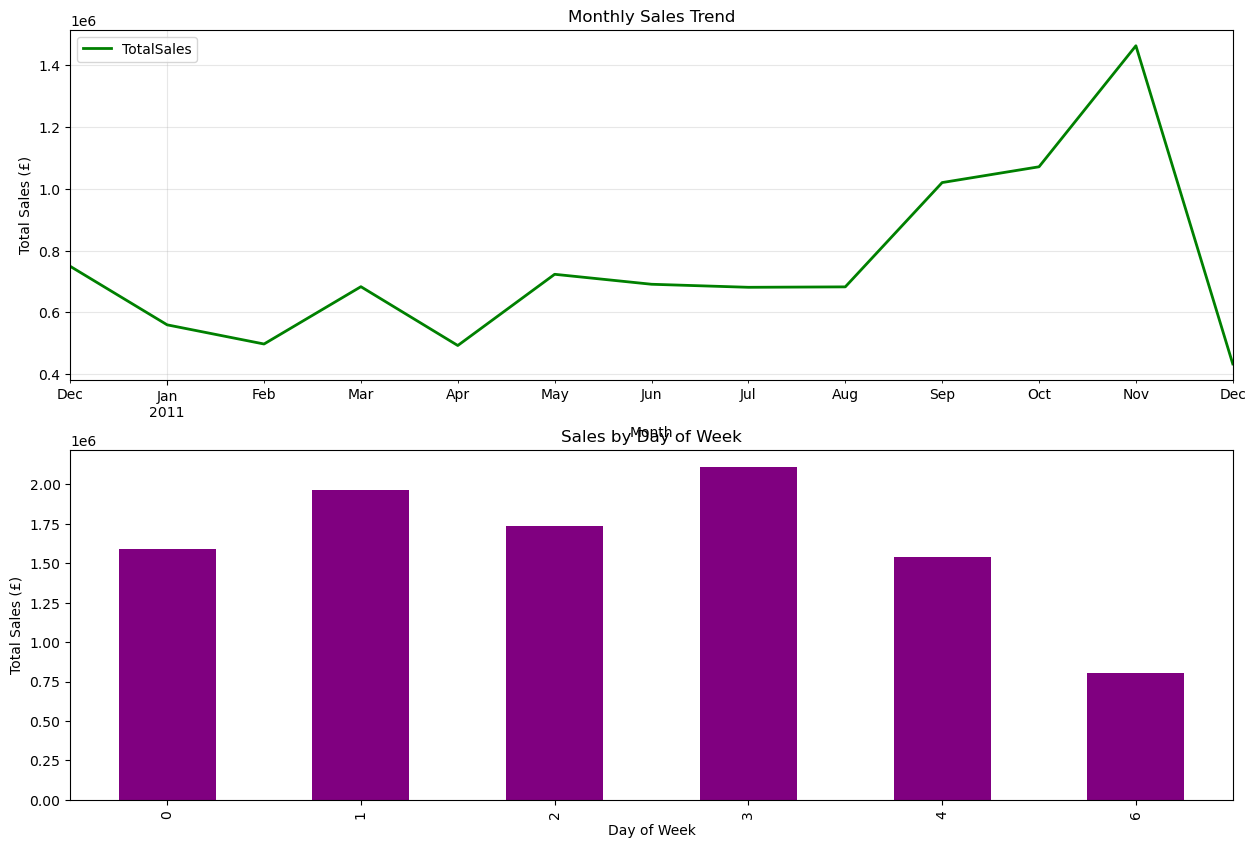

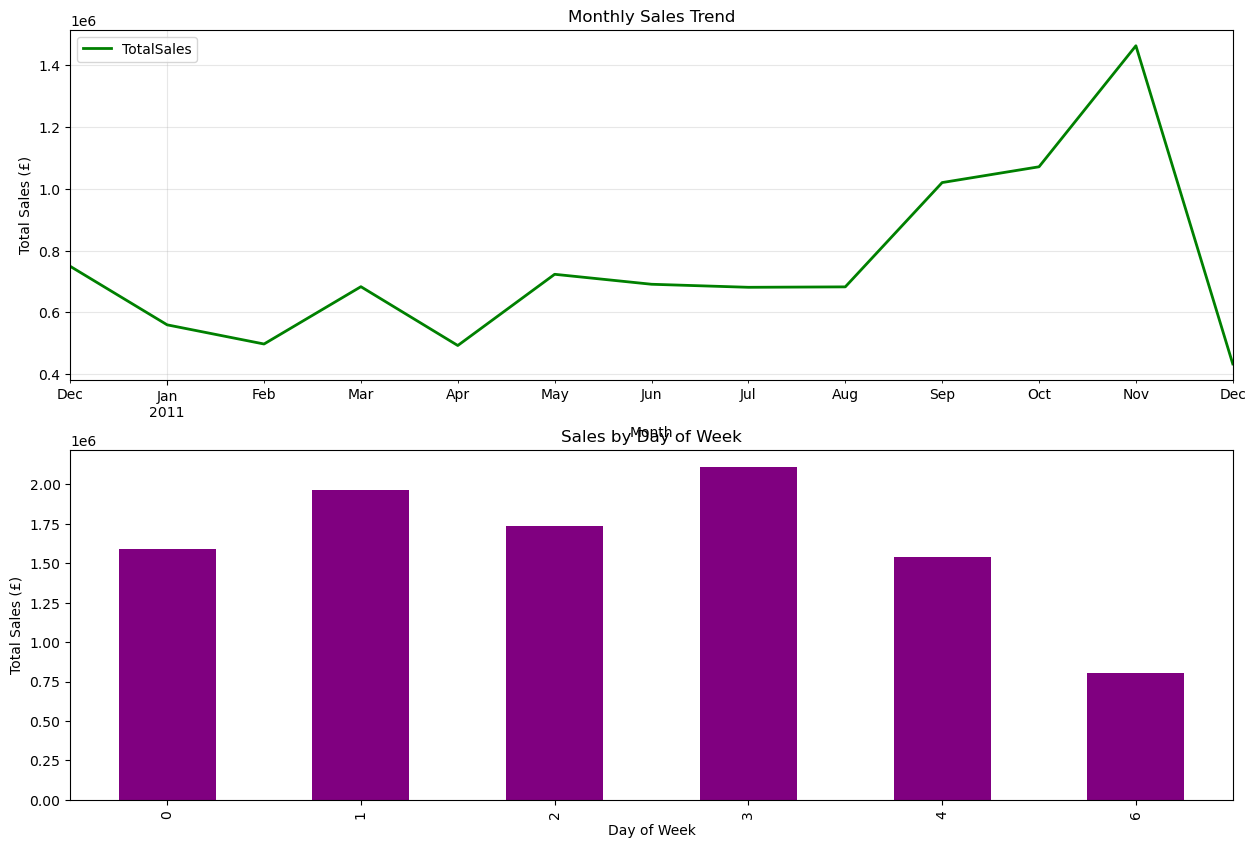

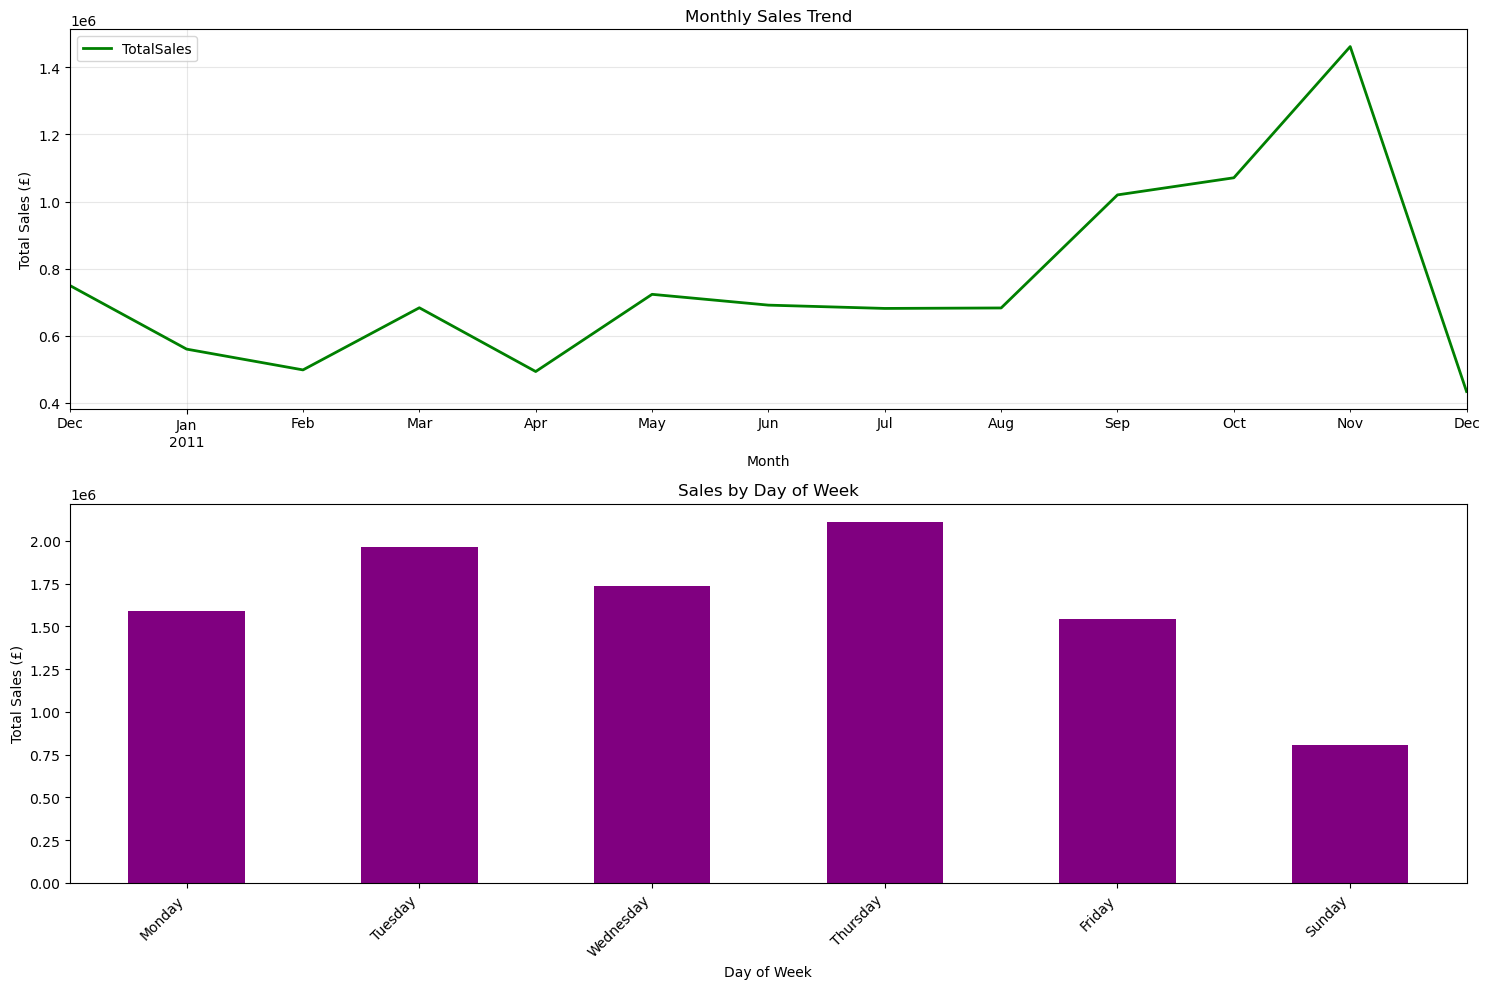

In [42]:
# Sales trends over time
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Monthly sales trend
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M')).agg({'TotalSales': 'sum'})
monthly_sales.plot(ax=axs[0], color='green', linewidth=2)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales (£)')
axs[0].set_title('Monthly Sales Trend')
axs[0].grid(True, alpha=0.3)

# Plot 2: Sales by day of week
dow_sales = df.groupby('DayOfWeek')['TotalSales'].sum()
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales.plot(kind='bar', ax=axs[1], color='purple')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Total Sales (£)')
axs[1].set_title('Sales by Day of Week')
# Use only the labels that correspond to existing day values
existing_labels = [dow_labels[i] for i in dow_sales.index]
axs[1].set_xticklabels(existing_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#####  Insights
- Clear seasonal patterns with peaks during certain months (likely holiday seasons)
- Week days show higher sales activity compared to weekends
- Consistent trend indicates stable customer base and predictable demand patterns
- November-December shows significant sales growth (Christmas shopping)

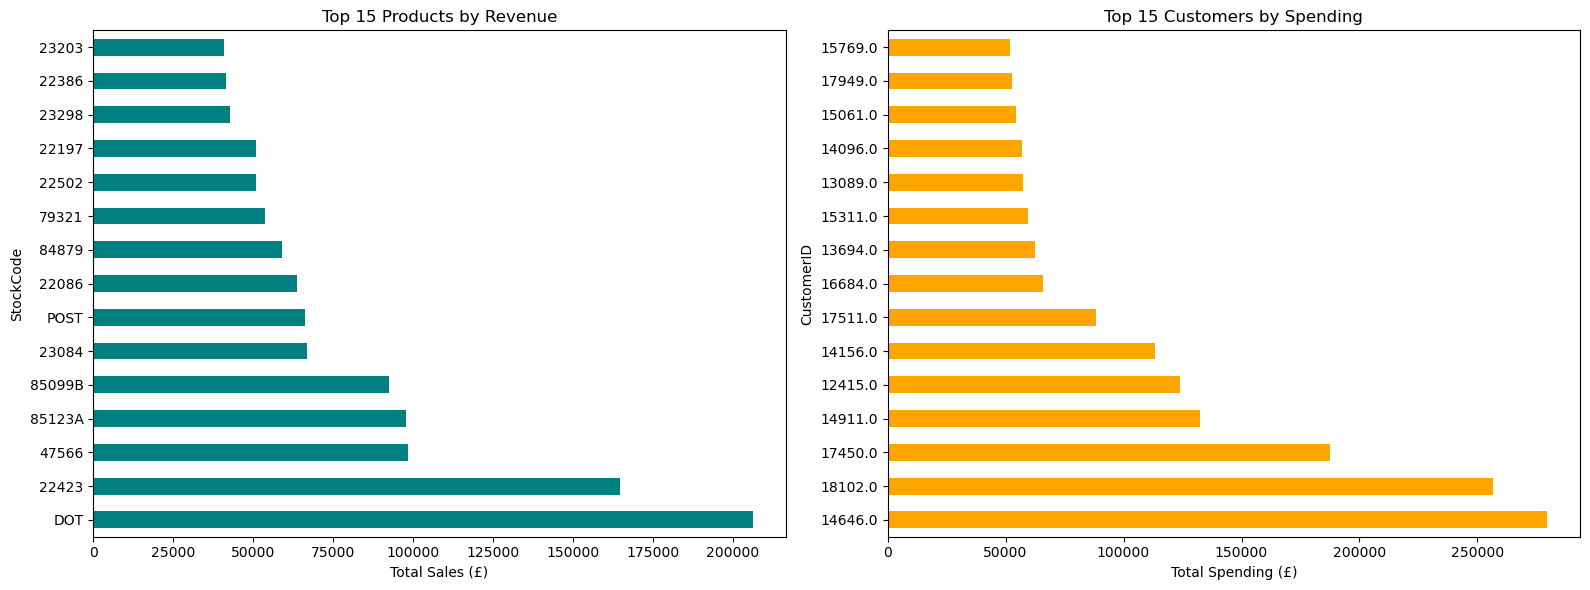

In [43]:
# Top products and customer analysis
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 products by revenue
top_products = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(15)
top_products.plot(kind='barh', ax=axs[0], color='teal')
axs[0].set_xlabel('Total Sales (£)')
axs[0].set_title('Top 15 Products by Revenue')

# Plot 2: Top 15 customers by spending
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(15)
top_customers.plot(kind='barh', ax=axs[1], color='orange')
axs[1].set_xlabel('Total Spending (£)')
axs[1].set_title('Top 15 Customers by Spending')

plt.tight_layout()
plt.show()

#####  Insights
- Few products drive majority of revenue - classic Pareto principle (80/20)
- Top customers represent significant portion of business (VIP segment)
- Product concentration suggests focus on popular items
- Customer concentration indicates importance of retention strategies for top customers

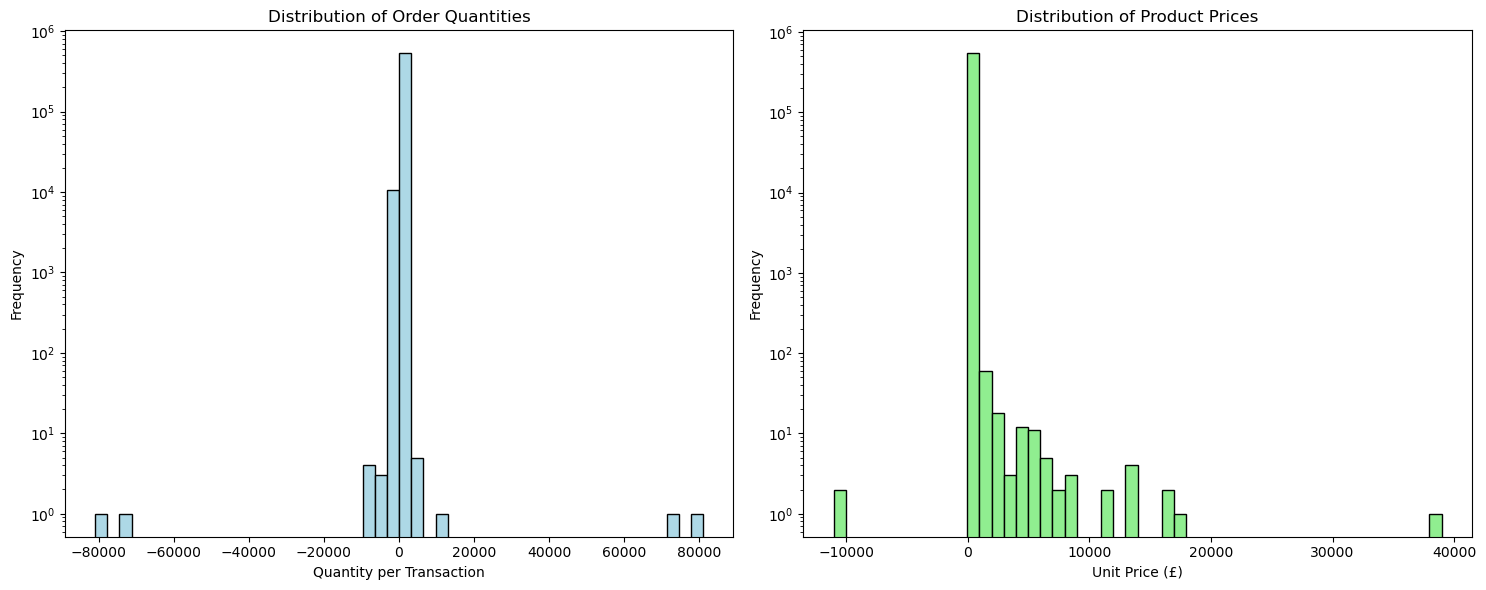

In [44]:
# Quantity and Price analysis
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Distribution of Quantity
axs[0].hist(df['Quantity'], bins=50, color='lightblue', edgecolor='black')
axs[0].set_xlabel('Quantity per Transaction')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Order Quantities')
axs[0].set_yscale('log')

# Plot 2: Distribution of Unit Price
axs[1].hist(df['UnitPrice'], bins=50, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Unit Price (£)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Product Prices')
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()

#####  Insights
- Most orders are for small quantities (bulk items rarely ordered)
- Product prices range from low-cost items to premium products
- Both distributions are right-skewed with outliers
- Suggests online shop with diverse but focused product range

#### 4.2 Customers and Geographic Distribution

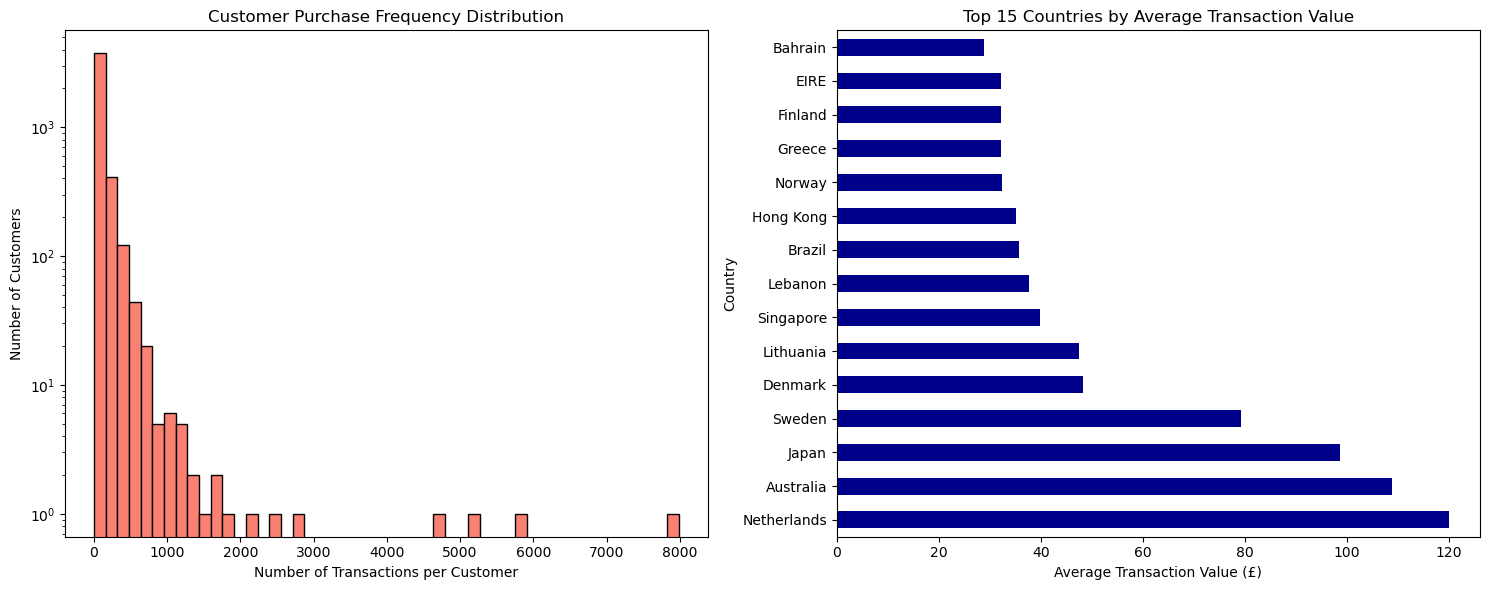

In [45]:
# Customer frequency and order patterns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Customer purchase frequency
customer_freq = df.groupby('CustomerID').size()
axs[0].hist(customer_freq, bins=50, color='salmon', edgecolor='black')
axs[0].set_xlabel('Number of Transactions per Customer')
axs[0].set_ylabel('Number of Customers')
axs[0].set_title('Customer Purchase Frequency Distribution')
axs[0].set_yscale('log')

# Plot 2: Average transaction value by country
country_avg = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).head(15)
country_avg.plot(kind='barh', ax=axs[1], color='darkblue')
axs[1].set_xlabel('Average Transaction Value (£)')
axs[1].set_title('Top 15 Countries by Average Transaction Value')

plt.tight_layout()
plt.show()

#### Insights
- Most customers make few transactions (one-time buyers) with some loyal repeat customers
- Loyal customers (those with 10+ transactions) are valuable for the business
- Average transaction value varies by country - some markets prefer higher-value purchases
- Geographic patterns show different customer behavior by region

#### 4.3 RFM Analysis (Recency, Frequency, Monetary)

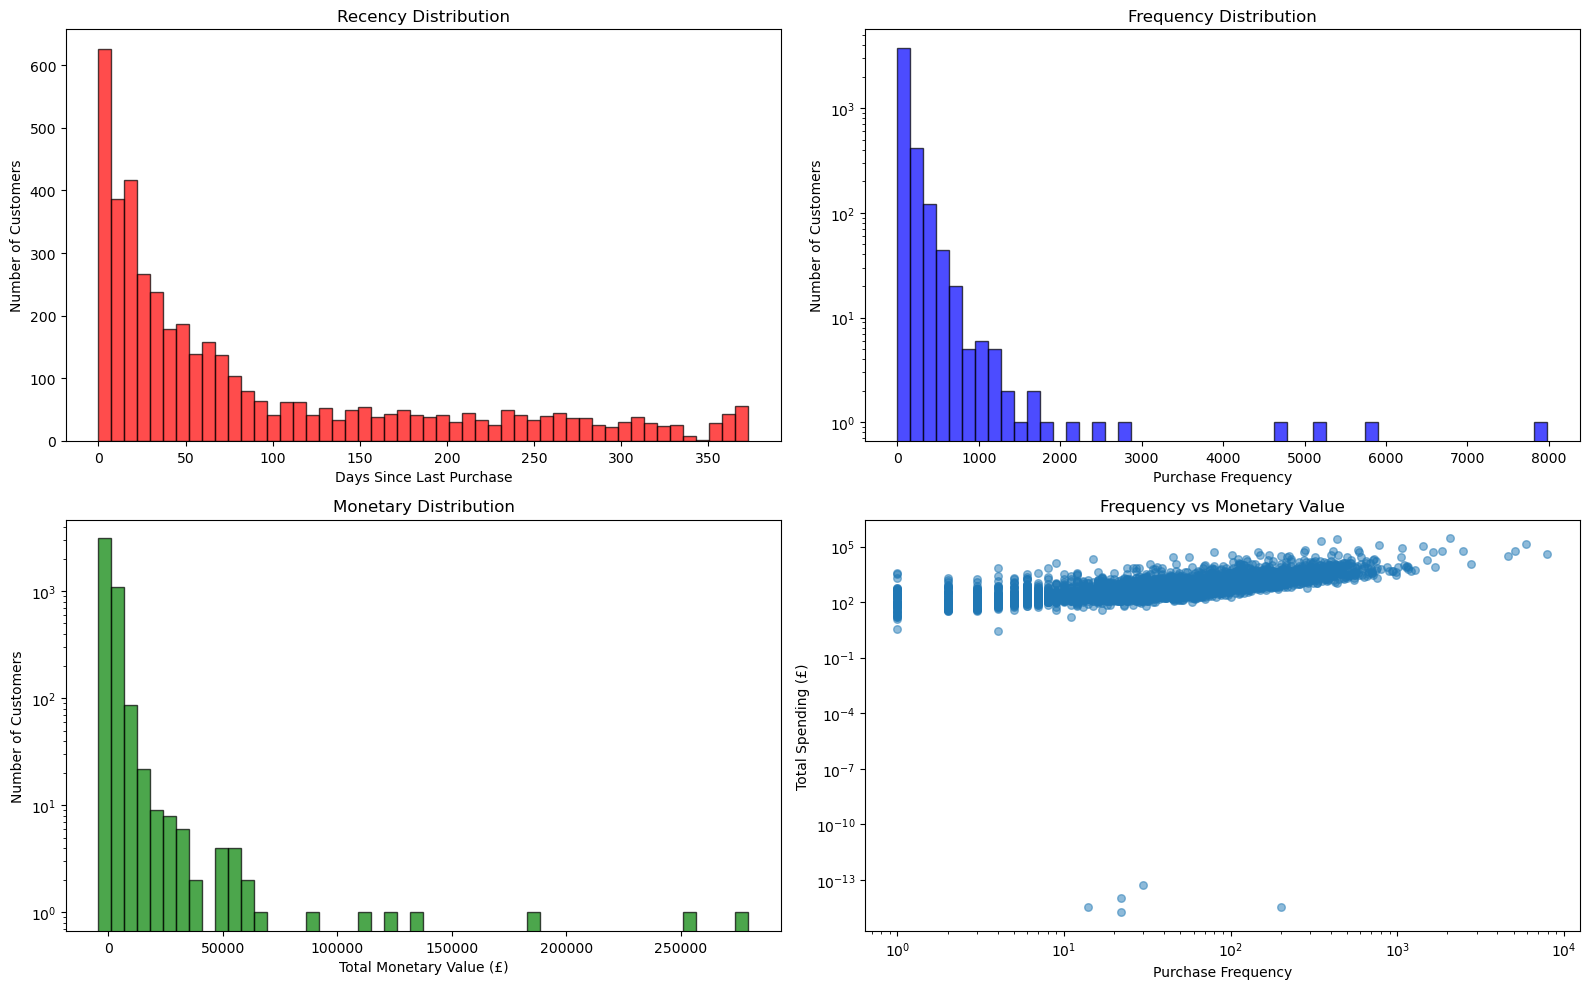

In [46]:
# RFM Analysis
from datetime import datetime, timedelta

# Set reference date as max date in dataset
reference_date = df['InvoiceDate'].max()

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'    # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Create customer segments based on RFM
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Recency distribution
axs[0, 0].hist(rfm['Recency'], bins=50, color='red', alpha=0.7, edgecolor='black')
axs[0, 0].set_xlabel('Days Since Last Purchase')
axs[0, 0].set_ylabel('Number of Customers')
axs[0, 0].set_title('Recency Distribution')

# Plot 2: Frequency distribution
axs[0, 1].hist(rfm['Frequency'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axs[0, 1].set_xlabel('Purchase Frequency')
axs[0, 1].set_ylabel('Number of Customers')
axs[0, 1].set_title('Frequency Distribution')
axs[0, 1].set_yscale('log')

# Plot 3: Monetary distribution
axs[1, 0].hist(rfm['Monetary'], bins=50, color='green', alpha=0.7, edgecolor='black')
axs[1, 0].set_xlabel('Total Monetary Value (£)')
axs[1, 0].set_ylabel('Number of Customers')
axs[1, 0].set_title('Monetary Distribution')
axs[1, 0].set_yscale('log')

# Plot 4: Frequency vs Monetary scatter
axs[1, 1].scatter(rfm['Frequency'], rfm['Monetary'], alpha=0.5, s=30)
axs[1, 1].set_xlabel('Purchase Frequency')
axs[1, 1].set_ylabel('Total Spending (£)')
axs[1, 1].set_title('Frequency vs Monetary Value')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

#####  Insights
- RFM Analysis reveals customer segments for targeted marketing:
  * Champions: Recent, frequent, high-spending customers (focus on retention)
  * At-Risk: Previously high-value customers who haven't purchased recently (re-engagement)
  * New Customers: Recent but low frequency (nurture into regular customers)
  * One-time Buyers: Low frequency and low monetary value (low priority)
- Most customers are either one-time buyers or very loyal repeat customers
- Strong positive correlation between frequency and monetary value

#### 4.4 Correlation Analysis and Feature Relationships

#### 4.4.1 Correlation Matrix and Relationships

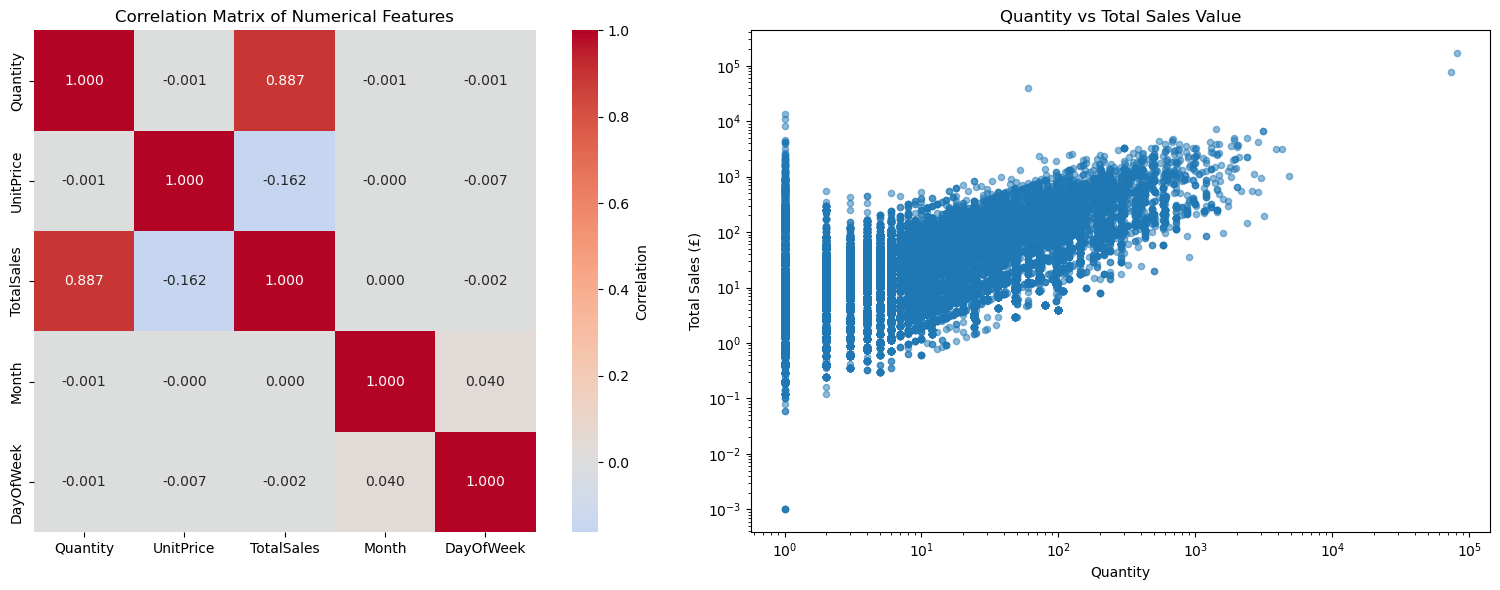

In [47]:
# Correlation analysis between numerical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Select numerical columns
numerical_cols = df[['Quantity', 'UnitPrice', 'TotalSales', 'Month', 'DayOfWeek']].corr()

# Heatmap
sns.heatmap(numerical_cols, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation Matrix of Numerical Features')

# Scatter: Quantity vs TotalSales
axes[1].scatter(df['Quantity'], df['TotalSales'], alpha=0.5, s=20)
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Total Sales (£)')
axes[1].set_title('Quantity vs Total Sales Value')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Insights 
- Strong positive correlation between Quantity and TotalSales (as expected)
- UnitPrice and Quantity show weak relationship (independent pricing strategy)
- Month shows seasonality effects on sales
- Day of week has minimal correlation with sales value 

#### 4.4.2 Missing Values and Data Quality

In [52]:
# Check for missing values  
missing_values = df.isnull().sum()
print("Missing Values Summary:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nNo missing values detected in the dataset!")
    
# Check for negative quantities and prices
negative_qty = (df['Quantity'] < 0).sum()
negative_price = (df['UnitPrice'] < 0).sum()
print(f"\nNegative quantities: {negative_qty}")
print(f"Negative prices: {negative_price}")

Missing Values Summary:
Description      1454
CustomerID     135080
dtype: int64

Negative quantities: 10624
Negative prices: 2


In [55]:
# Data quality observations
print("Data Quality Assessment:")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Unique customers: {df['CustomerID'].nunique():,}")
print(f"Unique products: {df['StockCode'].nunique():,}")
print(f"Countries represented: {df['Country'].nunique()}")
print(f"\nTotal Revenue: £{df['TotalSales'].sum():,.2f}")
print(f"Average order value: £{df['TotalSales'].mean():.2f}")

Data Quality Assessment:
Total records: 541,909
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Unique customers: 4,372
Unique products: 4,070
Countries represented: 38

Total Revenue: £9,747,747.93
Average order value: £17.99


### 5. Conclusions and Key Findings

#### Data Insights:
- **Revenue Concentration**: 80/20 principle applies - top 20% of products generate majority of revenue
- **Seasonal Patterns**: Clear peaks during November-December (holiday shopping season)
- **Geographic Strategy**: UK dominates, but strong European presence showing growth opportunity
- **Customer Segmentation**: 
  * High-value repeat customers (Champions) drive significant revenue
  * Large one-time buyer segments offer opportunity for re-engagement
  * RFM analysis identifies customers at risk of churn

#### Business Recommendations:
- **Inventory Management**: Focus on top 20% of products while managing tail inventory efficiently
- **Marketing**: Implement RFM-based segmentation for targeted campaigns
- **Seasonal Planning**: Prepare for holiday season rush with enhanced stock and staffing
- **Customer Retention**: Develop loyalty programs for repeat customers (frequency > 5 purchases)
- **Geographic Expansion**: Consider market development strategies for non-UK regions
- **Price Optimization**: Analyze price elasticity for different customer segments

#### Forecasting Opportunities:
- Time-series forecasting for monthly/seasonal demand
- Customer lifetime value (CLV) prediction
- Churn prediction for at-risk customers
- Product recommendation engine development